![Screenshot 2024-12-04 214542.png](<attachment:Screenshot 2024-12-04 214542.png>)
Import necessary libraries
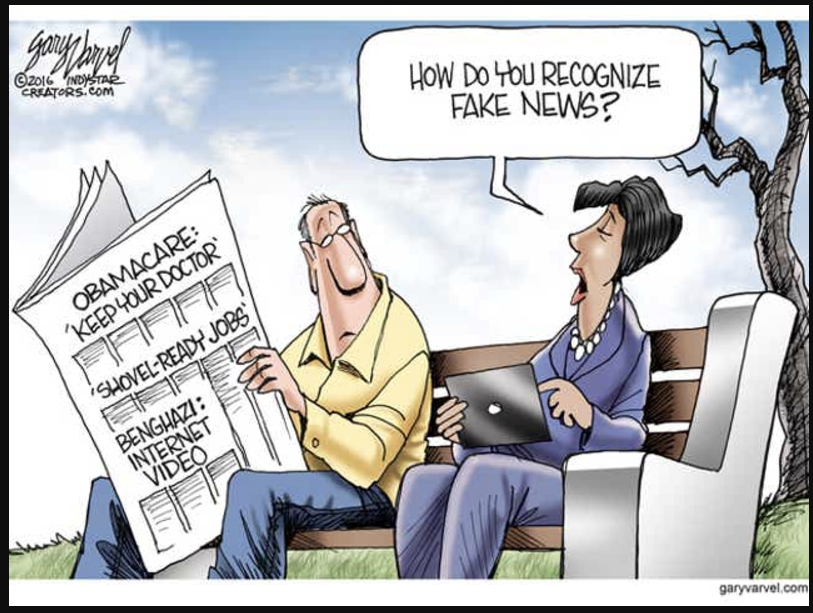

In [3]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string


  Importing datasets

In [4]:
df_true = pd.read_csv('C:/Users/Bhumika V/OneDrive/Desktop/New folder (2)/True.csv/True.csv')  # Replace with your true dataset file path
df_fake = pd.read_csv('C:/Users/Bhumika V/OneDrive/Desktop/New folder (2)/Fake.csv/Fake.csv')  # Replace with your false dataset file path

# Show the first 5 rows of both datasets
print("True Data Sample:")
df_true.head(5)

print("False Data Sample:")
df_fake.head(5)

True Data Sample:
False Data Sample:


,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


Inspecting df_true data

In [5]:
df_true.head(5)



,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column "class" as target feature

In [6]:
df_fake["class"] = 0
df_true["class"] = 1
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

Removing last 10 rows for manual testing

In [7]:
df_fake_manual_testing = df_fake.tail(10)
for i in range(23480, 23470, -1):
    df_fake.drop([i], axis=0, inplace=True)

df_true_manual_testing = df_true.tail(10)
for i in range(21416, 21406, -1):
    df_true.drop([i], axis=0, inplace=True)
df_fake.shape, df_true.shape

((23471, 5), (21407, 5))

 Adding "class" for manual testing

In [8]:
df_fake_manual_testing["class"] = 0
df_true_manual_testing["class"] = 1

C:\Users\Bhumika V\AppData\Local\Temp\ipykernel_32108\860779283.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fake_manual_testing["class"] = 0
C:\Users\Bhumika V\AppData\Local\Temp\ipykernel_32108\860779283.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_true_manual_testing["class"] = 1


Inspecting manual testing data

In [9]:
df_fake_manual_testing.head(10)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",0
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",0
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",0
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",0
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",0


Inspecting df_true manual testing data

In [10]:
df_true_manual_testing.head(10)

,title,text,subject,date,class
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017",1
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017",1
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017",1
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017",1
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017",1


Merging True and Fake Dataframes

In [11]:
df_merge = pd.concat([df_fake, df_true], axis=0)
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


 Removing unnecessary columns

In [12]:
df = df_merge.drop(["title", "subject", "date"], axis=1)
df.isnull().sum()

text     0
class    0
dtype: int64

 Random Shuffling the dataframe

In [13]:
df = df.sample(frac=1)
df.head()

,text,class
10220,Many on the left and in the liberal media are ...,0
11495,BERLIN (Reuters) - Ukrainian President Petro P...,1
17934,PARIS (Reuters) - France s hard-left CGT trade...,1
18159,ZURICH (Reuters) - Neutral Switzerland is read...,1
16879,MOSCOW (Reuters) - Pyongyang does not plan to ...,1


Resetting index

In [14]:
# Reset index and drop the 'index' column
df.reset_index(inplace=True)
df.drop(["index"], axis=1, inplace=True)

# View the columns of the dataframe
df.columns


Index(['text', 'class'], dtype='object')

Inspecting the dataframe after rese

In [15]:

df.head()

,text,class
0,Many on the left and in the liberal media are ...,0
1,BERLIN (Reuters) - Ukrainian President Petro P...,1
2,PARIS (Reuters) - France s hard-left CGT trade...,1
3,ZURICH (Reuters) - Neutral Switzerland is read...,1
4,MOSCOW (Reuters) - Pyongyang does not plan to ...,1


 Creating a function to process the texts

In [16]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W", " ", text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df["text"] = df["text"].apply(wordopt)

<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
<>:3: SyntaxWarning: invalid escape sequence '\['
<>:5: SyntaxWarning: invalid escape sequence '\S'
<>:9: SyntaxWarning: invalid escape sequence '\w'
C:\Users\Bhumika V\AppData\Local\Temp\ipykernel_32108\1364171802.py:3: SyntaxWarning: invalid escape sequence '\['
  text = re.sub('\[.*?\]', '', text)
C:\Users\Bhumika V\AppData\Local\Temp\ipykernel_32108\1364171802.py:5: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub('https?://\S+|www\.\S+', '', text)
C:\Users\Bhumika V\AppData\Local\Temp\ipykernel_32108\1364171802.py:9: SyntaxWarning: invalid escape sequence '\w'
  text = re.sub('\w*\d\w*', '', text)


 Defining dependent and independent variables

In [17]:
x = df["text"]
y = df["class"]

Splitting Training and Testing Data

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

Converting text to vectors using TfidfVectorizer

In [19]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

Logistic Regression Model

In [20]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(xv_train, y_train)
pred_lr = LR.predict(xv_test)
LR.score(xv_test, y_test)

0.9871657754010695

Displaying classification report for Logistic Regression

In [21]:
print(classification_report(y_test, pred_lr))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.98      0.99      0.99      5342

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



 Decision Tree Classification

In [22]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)
pred_dt = DT.predict(xv_test)
DT.score(xv_test, y_test)

0.9946524064171123

Displaying classification report for Decision Tree

In [23]:
print(classification_report(y_test, pred_dt))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5878
           1       1.00      0.99      0.99      5342

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Gradient Boosting Classifier

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train the GradientBoostingClassifier
GBC = GradientBoostingClassifier(n_estimators=100, random_state=0)
GBC.fit(xv_train, y_train)

# Make predictions and calculate accuracy
pred_gbc = GBC.predict(xv_test)
accuracy = accuracy_score(y_test, pred_gbc)

# Print accuracy and classification report
print(f"GradientBoostingClassifier Accuracy: {accuracy}")
print(classification_report(y_test, pred_gbc))


GradientBoostingClassifier Accuracy: 0.9949197860962566
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5878
           1       0.99      1.00      0.99      5342

    accuracy                           0.99     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       0.99      0.99      0.99     11220



 Displaying classification report for Gradient Boosting

In [29]:
print(classification_report(y_test, pred_gbc))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5878
           1       0.99      1.00      0.99      5342

    accuracy                           0.99     11220
   macro avg       0.99      1.00      0.99     11220
weighted avg       0.99      0.99      0.99     11220



Random Forest Classifier

In [30]:
from sklearn.ensemble import RandomForestClassifier

RFC = RandomForestClassifier(random_state=0)
RFC.fit(xv_train, y_train)
pred_rfc = RFC.predict(xv_test)
RFC.score(xv_test, y_test)



0.9902852049910873

 Displaying classification report for Random Forest

In [31]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5878
           1       0.99      0.99      0.99      5342

    accuracy                           0.99     11220
   macro avg       0.99      0.99      0.99     11220
weighted avg       0.99      0.99      0.99     11220



xgboost model

In [32]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming `xv_train`, `y_train`, `xv_test`, and `y_test` are already defined

# Initialize the XGBoost classifier
xgboost_model = xgb.XGBClassifier(
    objective='binary:logistic', 
    eval_metric='logloss', 
    random_state=0,
    use_label_encoder=False
)

# Train the model
xgboost_model.fit(xv_train, y_train)

# Predict on the test set
pred_xgb = xgboost_model.predict(xv_test)

# Evaluate the model
accuracy = accuracy_score(y_test, pred_xgb)
cm_xgb = confusion_matrix(y_test, pred_xgb)
classification_rep = classification_report(y_test, pred_xgb)

# Print the results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(cm_xgb)
print("Classification Report:")
print(classification_rep)


c:\Users\Bhumika V\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:25:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.9975044563279858
Confusion Matrix:
[[5863   15]
 [  13 5329]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5878
           1       1.00      1.00      1.00      5342

    accuracy                           1.00     11220
   macro avg       1.00      1.00      1.00     11220
weighted avg       1.00      1.00      1.00     11220



Categorical Distribution (Bar Plot)

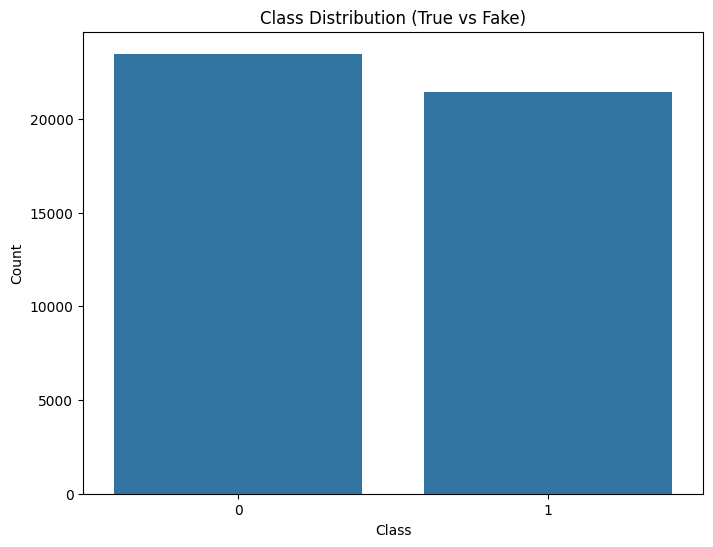

In [33]:
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution (True vs Fake)')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

 Support Vector Machine Model

In [ ]:
from sklearn.svm import SVC  # Import the SVC class

# Create and train the model
svm = SVC()
svm.fit(xv_train, y_train)

# Make predictions
pred_svm = svm.predict(xv_test)

# Calculate accuracy
accuracy_svm = accuracy_score(y_test, pred_svm)

print("SVM Accuracy:", accuracy_svm)
 

 Naive Bayes Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB  # Import the MultinomialNB class

# Create and train the model
nb = MultinomialNB()
nb.fit(xv_train, y_train)

# Make predictions
pred_nb = nb.predict(xv_test)

# Calculate accuracy
accuracy_nb = accuracy_score(y_test, pred_nb)

print("Naive Bayes Accuracy:", accuracy_nb)


Naive Bayes Accuracy: 0.9354723707664884


K-Nearest Neighbors Model

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(xv_train, y_train)
pred_knn = knn.predict(xv_test)
accuracy_knn = accuracy_score(y_test, pred_knn)

 Plotting the graphs (all in one cell)

In [ ]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, accuracy_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.utils import resample

# Assuming `df` is your dataframe and `xv_train` is a sparse matrix
# Ensure `df` contains `class` and `text` columns.

# Setup Subplots
fig = make_subplots(
    rows=5, cols=3, 
    subplot_titles=(
        "Class Distribution", "Text Length by Class", "Model Accuracies",
        "Confusion Matrix (Logistic Regression)", "Precision-Recall Curve (SVM)", "ROC Curve (SVM)",
        "Top 20 Features (Decision Tree)", "Confusion Matrix (Naive Bayes)", "Confusion Matrix (Random Forest)",
        "K-Means Clustering", "PCA - Reduced Dimensionality", "Additional Visualization"
    )
)

# 1. Class Distribution
class_counts = df['class'].value_counts()
fig.add_trace(
    go.Bar(x=class_counts.index, y=class_counts.values, name="Class Distribution"),
    row=1, col=1
)

# 2. Text Length by Class
fig.add_trace(
    go.Box(x=df['class'], y=df['text'].apply(len), name="Text Length by Class"),
    row=1, col=2
)

# 3. Model Accuracies
model_accuracies = [accuracy_score(y_test, pred_lr), accuracy_svm, accuracy_score(y_test, pred_dt), 
                    accuracy_score(y_test, pred_gbc), accuracy_score(y_test, pred_rfc), accuracy_nb, accuracy_knn]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'Naive Bayes', 'KNN']
fig.add_trace(
    go.Bar(x=model_names, y=model_accuracies, name="Model Accuracies"),
    row=1, col=3
)

# 4. Confusion Matrix (Logistic Regression)
cm_lr = confusion_matrix(y_test, pred_lr)
fig.add_trace(
    go.Heatmap(z=cm_lr, x=['Fake', 'True'], y=['Fake', 'True'], colorscale='Blues', name="Confusion Matrix (LR)"),
    row=2, col=1
)

# 5. Precision-Recall Curve (SVM)
precision, recall, _ = precision_recall_curve(y_test, pred_svm)
fig.add_trace(
    go.Scatter(x=recall, y=precision, mode='lines', name="Precision-Recall Curve (SVM)"),
    row=2, col=2
)

# 6. ROC Curve (SVM)
fpr, tpr, _ = roc_curve(y_test, pred_svm)
fig.add_trace(
    go.Scatter(x=fpr, y=tpr, mode='lines', name="ROC Curve (SVM)"),
    row=2, col=3
)

# 7. Top 20 Features (Decision Tree)
feature_importances = DT.feature_importances_
top_features = sorted(zip(feature_importances, range(len(feature_importances))), reverse=True)[:20]
fig.add_trace(
    go.Bar(
        x=[f"Feature {idx}" for _, idx in top_features],
        y=[importance for importance, _ in top_features],
        name="Top 20 Features (DT)"
    ),
    row=3, col=1
)

# 8. Naive Bayes Confusion Matrix
cm_nb = confusion_matrix(y_test, pred_nb)
fig.add_trace(
    go.Heatmap(z=cm_nb, x=['Fake', 'True'], y=['Fake', 'True'], colorscale='Reds', name="Confusion Matrix (NB)"),
    row=3, col=2
)

# 9. Random Forest Confusion Matrix
cm_rfc = confusion_matrix(y_test, pred_rfc)
fig.add_trace(
    go.Heatmap(z=cm_rfc, x=['Fake', 'True'], y=['Fake', 'True'], colorscale='Greens', name="Confusion Matrix (RFC)"),
    row=3, col=3
)

# 10. K-Means Clustering (Sampled Data)
sample_size = 5000
xv_train_sampled = resample(xv_train, n_samples=sample_size, random_state=42)
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(xv_train_sampled)
fig.add_trace(
    go.Scatter(x=kmeans.labels_, y=df['text'].iloc[:sample_size].apply(len), mode='markers', name="K-Means Clustering"),
    row=4, col=1
)

# 11. PCA - Reduced Dimensionality
pca = PCA(n_components=2, random_state=42)
xv_train_reduced = pca.fit_transform(xv_train_sampled)
fig.add_trace(
    go.Scatter(x=xv_train_reduced[:, 0], y=xv_train_reduced[:, 1], mode='markers', name="PCA Reduced Dimensionality"),
    row=4, col=2
)

# 12. Placeholder for Additional Visualization
fig.add_trace(
    go.Scatter(x=[0, 1], y=[1, 0], mode='lines', name="Placeholder"),
    row=4, col=3
)

# Update Layout
fig.update_layout(
    height=1500,
    width=1800,
    title_text="Fake News Detection Model Visualizations",
    showlegend=True
)

fig.show()
